In [1]:
#importing the Libraries

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
#from plot_metric.functions import BinaryClassification

In [3]:
train = pd.read_csv(r"C:\Users\lenovo\Downloads\archive\train.csv")


In [4]:
test = pd.read_csv (r"C:\Users\lenovo\Downloads\archive\test.csv")

In [5]:
#top 5 rows

In [6]:
train.head()
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [ ]:
#top 5 Rows

In [7]:
train.tail()
test.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
127032,508142,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56
127033,508143,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165
127034,508144,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74
127035,508145,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265
127036,508146,Male,41,1,29.0,1,1-2 Year,No,27927.0,124.0,231


In [ ]:
#no of missing values in training set

In [8]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [ ]:
#Data Type of train Set

In [9]:
train.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [ ]:
#no of rows and columns in train set

In [10]:
train.shape

(381109, 12)

In [ ]:
#no of rows and columns in test set

In [11]:
test.shape

(127037, 11)

In [12]:
cat = train.select_dtypes("object")
cat.dtypes

Gender            object
Vehicle_Age       object
Vehicle_Damage    object
dtype: object

In [13]:
cat_data = cat.astype('category')

In [14]:
cat_data.dtypes

Gender            category
Vehicle_Age       category
Vehicle_Damage    category
dtype: object

In [15]:
cat1 = test.select_dtypes("object")
cat1.dtypes

Gender            object
Vehicle_Age       object
Vehicle_Damage    object
dtype: object

In [16]:
cat1_data = cat1.astype('category')

In [17]:
cat1_data.dtypes

Gender            category
Vehicle_Age       category
Vehicle_Damage    category
dtype: object

In [18]:
num_data = train.select_dtypes('int64')
float_data = train.select_dtypes('float64')

In [19]:
num_data = test.select_dtypes('int64')
float_data = test.select_dtypes('float64')

In [20]:
train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [21]:
test.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
count,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000
mean,444628.000000,38.765903,0.998134,26.459866,0.460039,30524.643576,111.800468,154.318301
std,36672.567411,15.465814,0.043152,13.209916,0.498403,16945.297103,54.371765,83.661588
min,381110.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000
25%,412869.000000,25.000000,1.000000,15.000000,0.000000,24325.000000,26.000000,82.000000
50%,444628.000000,36.000000,1.000000,28.000000,0.000000,31642.000000,135.000000,154.000000
75%,476387.000000,49.000000,1.000000,35.000000,1.000000,39408.000000,152.000000,227.000000
max,508146.000000,85.000000,1.000000,52.000000,1.000000,472042.000000,163.000000,299.000000


In [22]:
corr_df = train.corr()
corr_df

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,1.000000,0.001561,-0.000564,-0.000572,0.002457,0.003027,-0.002837,-0.000630,-0.001368
Age,0.001561,1.000000,-0.079782,0.042574,-0.254682,0.067507,-0.577826,-0.001264,0.111147
Driving_License,-0.000564,-0.079782,1.000000,-0.001081,0.014969,-0.011906,0.043731,-0.000848,0.010155
Region_Code,-0.000572,0.042574,-0.001081,1.000000,-0.024659,-0.010588,-0.042420,-0.002750,0.010570
Previously_Insured,0.002457,-0.254682,0.014969,-0.024659,1.000000,0.004269,0.219381,0.002537,-0.341170
Annual_Premium,0.003027,0.067507,-0.011906,-0.010588,0.004269,1.000000,-0.113247,-0.000608,0.022575
Policy_Sales_Channel,-0.002837,-0.577826,0.043731,-0.042420,0.219381,-0.113247,1.000000,0.000002,-0.139042
Vintage,-0.000630,-0.001264,-0.000848,-0.002750,0.002537,-0.000608,0.000002,1.000000,-0.001050
Response,-0.001368,0.111147,0.010155,0.010570,-0.341170,0.022575,-0.139042,-0.001050,1.000000


In [23]:
corr_df1 = test.corr()
corr_df1

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
id,1.000000,-0.005364,-0.003581,-0.001574,-0.000281,0.001386,0.002911,0.001225
Age,-0.005364,1.000000,-0.079374,0.038878,-0.258282,0.067038,-0.574722,0.003761
Driving_License,-0.003581,-0.079374,1.000000,0.002596,0.012455,-0.012664,0.040185,-0.000858
Region_Code,-0.001574,0.038878,0.002596,1.000000,-0.022001,-0.016349,-0.041618,0.001984
Previously_Insured,-0.000281,-0.258282,0.012455,-0.022001,1.000000,0.006327,0.227189,-0.000953
Annual_Premium,0.001386,0.067038,-0.012664,-0.016349,0.006327,1.000000,-0.116452,-0.001607
Policy_Sales_Channel,0.002911,-0.574722,0.040185,-0.041618,0.227189,-0.116452,1.000000,-0.003257
Vintage,0.001225,0.003761,-0.000858,0.001984,-0.000953,-0.001607,-0.003257,1.000000


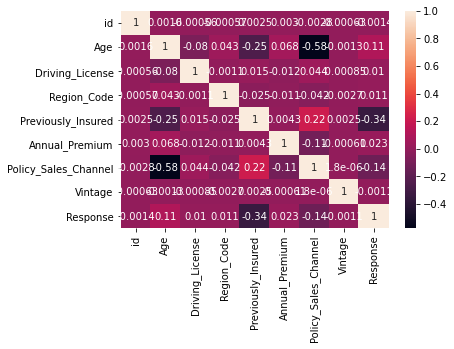

In [24]:
sns.heatmap(corr_df,annot = True)


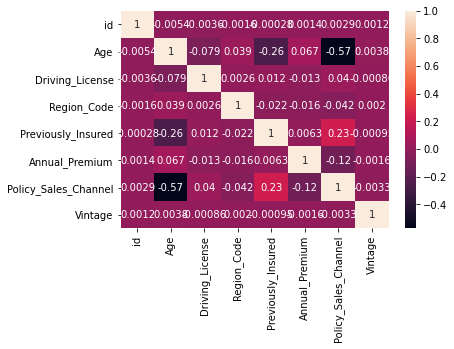

In [25]:
sns.heatmap(corr_df1 , annot =True)

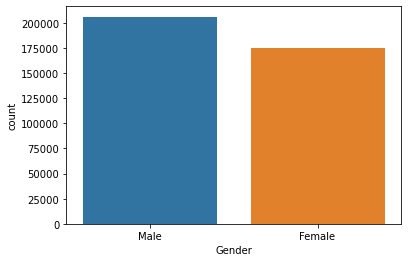

In [26]:
sns.countplot("Gender",data =train)
plt.show()

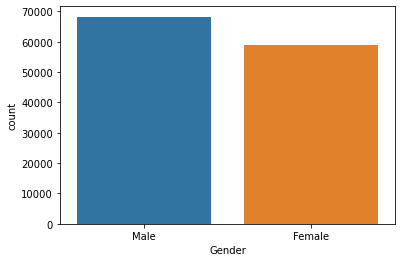

In [27]:
sns.countplot("Gender",data=test)
plt.show()

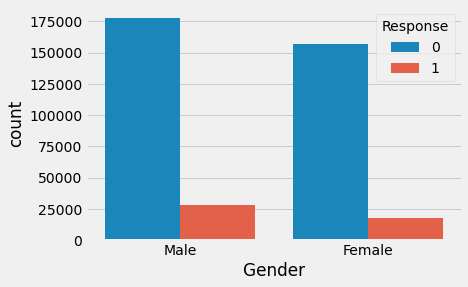

In [28]:
plt.style.use("fivethirtyeight")
sns.countplot(x = "Gender",data = train,hue = "Response" )
plt.show()

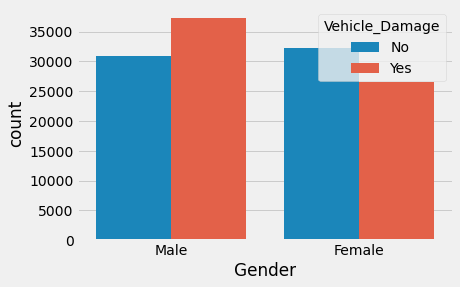

In [29]:
plt.style.use("fivethirtyeight")
sns.countplot(x = "Gender" , data =test ,hue = "Vehicle_Damage")
plt.show()

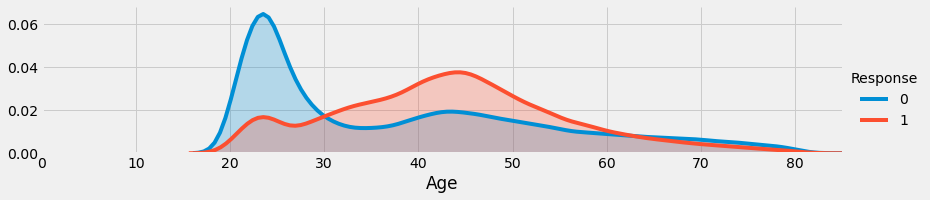

In [30]:
facet  =  sns.FacetGrid(train , hue ="Response" , aspect = 4)
facet.map(sns.kdeplot ,"Age" ,shade =True)
facet.set(xlim = (0,train["Age"].max()))
facet.add_legend()
plt.show()

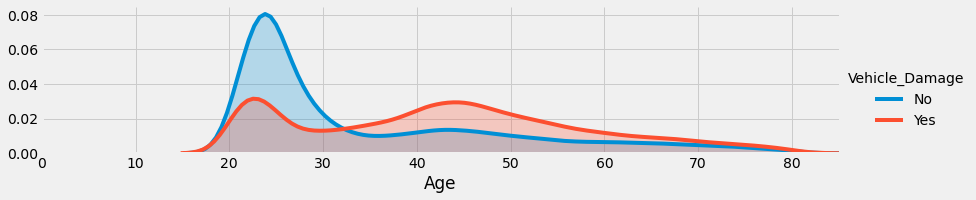

In [31]:
facet  =  sns.FacetGrid(test , hue ="Vehicle_Damage" , aspect = 4)
facet.map(sns.kdeplot ,"Age" ,shade =True)
facet.set(xlim = (0,train["Age"].max()))
facet.add_legend()
plt.show()

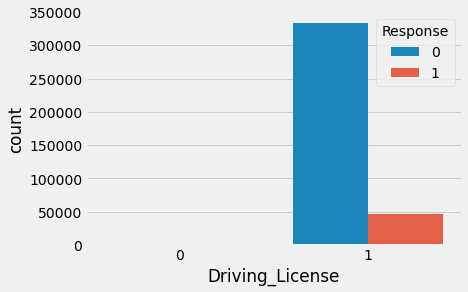

In [32]:
sns.countplot("Driving_License" , data =train ,hue = "Response")
plt.show()

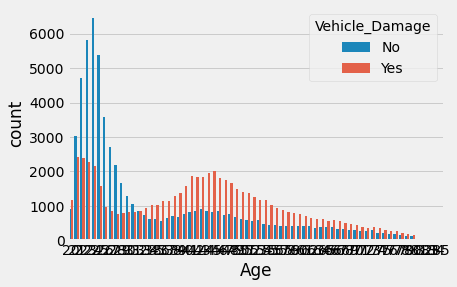

In [33]:
sns.countplot ("Age" , data = test ,hue = "Vehicle_Damage")
plt.show()

In [34]:
train["Response"].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [35]:
test["Vehicle_Damage"].value_counts()

Yes    63835
No     63202
Name: Vehicle_Damage, dtype: int64

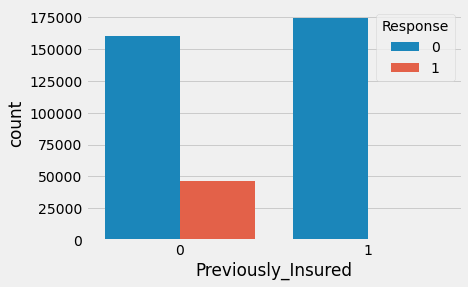

In [36]:
sns.countplot(x = "Previously_Insured" , data =train , hue = "Response")
plt.show()

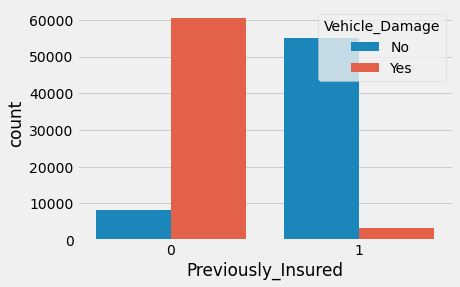

In [37]:
sns.countplot (x ="Previously_Insured", data =test , hue ="Vehicle_Damage")
plt.show()

In [38]:
train.drop(["id","Region_Code","Policy_Sales_Channel"],axis =1 ,inplace = True)
train.head()

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response
0,Male,44,1,0,> 2 Years,Yes,40454.0,217,1
1,Male,76,1,0,1-2 Year,No,33536.0,183,0
2,Male,47,1,0,> 2 Years,Yes,38294.0,27,1
3,Male,21,1,1,< 1 Year,No,28619.0,203,0
4,Female,29,1,1,< 1 Year,No,27496.0,39,0


In [39]:
test.drop(["id","Policy_Sales_Channel","Vintage"],axis = 1 ,inplace = True)
test.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium
0,Male,25,1,11.0,1,< 1 Year,No,35786.0
1,Male,40,1,28.0,0,1-2 Year,Yes,33762.0
2,Male,47,1,28.0,0,1-2 Year,Yes,40050.0
3,Male,24,1,27.0,1,< 1 Year,Yes,37356.0
4,Male,27,1,28.0,1,< 1 Year,No,59097.0


In [40]:
le = LabelEncoder()
train["Vehicle_Damage"] = le.fit_transform(train["Vehicle_Damage"])

In [41]:
le1 = LabelEncoder()
test["Vehicle_Damage"] = le1.fit_transform(test["Vehicle_Damage"])

In [42]:
train =  pd.get_dummies(train,drop_first=True)
train.head()

,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,44,1,0,1,40454.0,217,1,1,0,1
1,76,1,0,0,33536.0,183,0,1,0,0
2,47,1,0,1,38294.0,27,1,1,0,1
3,21,1,1,0,28619.0,203,0,1,1,0
4,29,1,1,0,27496.0,39,0,0,1,0


In [43]:
test =  pd.get_dummies(test,drop_first=True)
test.head()

,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,25,1,11.0,1,0,35786.0,1,1,0
1,40,1,28.0,0,1,33762.0,1,0,0
2,47,1,28.0,0,1,40050.0,1,0,0
3,24,1,27.0,1,1,37356.0,1,1,0
4,27,1,28.0,1,0,59097.0,1,1,0


In [44]:
x = train.drop("Response", axis = 1)
y = train["Response"]

In [45]:
x1 = test.drop("Gender_Male", axis = 1)
y1 = test["Gender_Male"]

In [46]:
model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

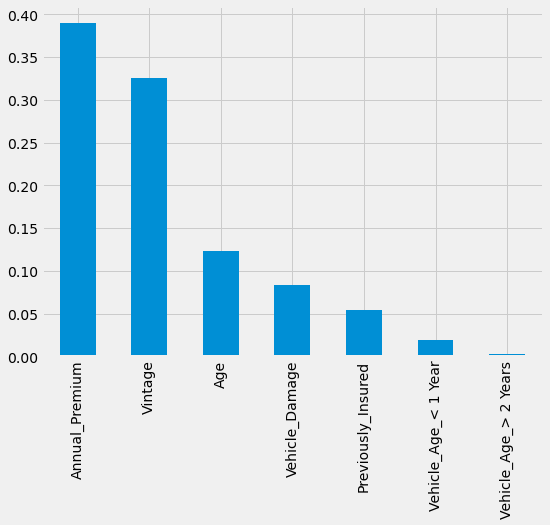

In [47]:
plt.figure(figsize=(8,6))
important_features = pd.Series(model.feature_importances_,index = x.columns)
important_features.nlargest(7).plot(kind = "bar")
plt.show()

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [49]:
dt_clf = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 100 ,random_state =0)
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=100, random_state=0)

In [50]:
dt_pred = dt_clf.predict(x_test)
dt_accuracy = accuracy_score(y_test,dt_pred)
dt_accuracy

0.8251817060691139

In [51]:
rf_clf = RandomForestClassifier(n_estimators = 200 ,random_state =0)
rf_clf.fit(x_train , y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [52]:
rf_pred = rf_clf.predict(x_test)
rf_accuracy = accuracy_score(y_test,rf_pred)
rf_accuracy

0.8527590459447404

In [53]:
lr_clf = LogisticRegression(random_state = 0)
lr_clf.fit(x_train ,y_train)

LogisticRegression(random_state=0)

In [54]:
lr_pred = lr_clf.predict(x_test)
lr_accuracy = accuracy_score(y_test,lr_pred)
lr_accuracy

0.8768990580147464

In [58]:
knn_clf  =  KNeighborsClassifier(n_neighbors = 20)
knn_clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [59]:
knn_pred = knn_clf.predict(x_test)
knn_accuracy = accuracy_score(y_test,knn_pred)
knn_accuracy

0.8767678622969747

In [61]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90     66846
           1       0.28      0.28      0.28      9376

    accuracy                           0.83     76222
   macro avg       0.59      0.59      0.59     76222
weighted avg       0.82      0.83      0.82     76222



In [62]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     66846
           1       0.31      0.16      0.21      9376

    accuracy                           0.85     76222
   macro avg       0.60      0.56      0.57     76222
weighted avg       0.82      0.85      0.83     76222



In [63]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66846
           1       0.35      0.00      0.00      9376

    accuracy                           0.88     76222
   macro avg       0.61      0.50      0.47     76222
weighted avg       0.81      0.88      0.82     76222



In [64]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66846
           1       0.10      0.00      0.00      9376

    accuracy                           0.88     76222
   macro avg       0.49      0.50      0.47     76222
weighted avg       0.78      0.88      0.82     76222

